**INTRODUCTION**

Here our project aims to develop a neural network model that can classify the tumors as malignant or benign by using the Breast Cancer Wisconsin Dataset from `sklearn`. The goal of this project is to produce an accurate and reliable model that assists in early detection by applying machine learning to support medical diagnostics.

**IMPORTING THE LIBRARIES AND NECESSARY DEPENDENCIES**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Below are the imports used:

 **NumPy** for creating arrays and performing mathematical computations, **Pandas** for handling data in the form of DataFrames, and **Matplotlib** for visualizing results after training. Additionally, **sklearn.datasets** provides datasets, and **train_test_split** is used for splitting the data into training and testing sets.

**DATA COLLECTION AND PRE PROCESSING**

**LOADING THE DATASET**

In [43]:
dataset = sklearn.datasets.load_breast_cancer()

In [44]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

**LOADING THE DATA IN DATAFRAME**

In [45]:
finaldataset= pd.DataFrame(dataset.data , columns = dataset.feature_names )

In [46]:
finaldataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
finaldataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**ADDING THE TARGET COLUMN TO DATAFRAME**

In [48]:
finaldataset['label']= dataset.target

In [49]:
finaldataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [50]:
finaldataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [51]:
finaldataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [52]:
finaldataset.shape

(569, 31)

In [53]:
finaldataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [54]:
finaldataset.isnull().sum( )

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [55]:
finaldataset['label'].value_counts()

,count
label,
1,357
0,212


in this dataset as we can see thers no imbalance on large extent so we can ignore it that we will not have to use methods like upsampeling or downsampeling.


here


**1 = Benign(non-cancerous)**

A benign tumor or condition is non-cancerous. It generally does not spread to other parts of the body and is not considered life-threatening. While it can cause symptoms due to its size or location, it usually does not pose a significant risk to health.

**0 =Malignant(cancerous)**

A malignant tumor or condition is cancerous. It has the potential to grow uncontrollably and spread to other parts of the body (a process known as metastasis). Malignant tumors can be life-threatening and often require more aggressive treatment.

In [56]:
finaldataset.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**SPLITTING THE FEATURES AND TAEGET VARIABLES**

In [57]:
X = finaldataset.drop(columns='label',axis=1)
Y = finaldataset['label']

In [58]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [59]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


**TRAIN_TEST SPLIT**

In [60]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.2,random_state=42)

In [61]:
X.shape,X_train.shape,X_test.shape

((569, 30), (455, 30), (114, 30))

**STANDAEDIZE THE DATA**

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

#**BUILDING A NEURAL NETWORK**

In [64]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

TensorFlow is a deep learning library developed by Google, and it's used quite widely to build neural networks because of its extensive functionality. Keras is a wrapper for TensorFlow, often referred to as such, which makes building neural networks much easier with its very simple API. Until the appearance of TensorFlow and Keras, neural networks were considerably harder to develop.

As mentioned earlier, during the training process in neural networks, the weights and parameters get initialized randomly; hence, for each run of the model, there may be minute changes in the values of accuracy. We used `random.set_seed(3)`, which fixes this random initialization and thus always presents the same accuracy score over different runs for reproducibility.

**SETTING KERAS NETWORK (CREATING LAYERS OF NN IE.INPUT LAYER,HIDDEN LAYER AND OUTPUT LAYER)**

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(40,activation = 'relu'),
    keras.layers.Dense(2,activation = 'sigmoid')
]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Flatten** is used to transform the data of `X_train` and `X_test` into a uni-dimensional array. The number `30` indicates the number of input features, that is, the 30 columns in the dataset.

In the **hidden layer**, the number `40` represents the number of neurons in that layer. For the **output layer**, 2 neurons are used because the number of neurons is equal to the number of classes in the target variable. This process is called the **firing of neurons**, where if one neuron outputs `1` (for example, for class 0), the other neuron will not fire (output `0`) and vice versa. This setup ensures accurate classification.

**COMPLING THE NEURAL NETWORK**

In [66]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**NOTE:**

while using categorical variables in dataet like 0,1 we use 'sparse_categorical_crossentropy' and when we have one hot encoded labels we have 'categorical_crossentophy'

**TRAINING THE NEURAL NETWORK**

In [67]:
history = model.fit(X_train_std,Y_train , validation_split =.1 ,epochs=20)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7222 - loss: 0.5641 - val_accuracy: 0.8261 - val_loss: 0.3642
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8859 - loss: 0.2999 - val_accuracy: 0.8913 - val_loss: 0.2458
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9237 - loss: 0.2148 - val_accuracy: 0.9348 - val_loss: 0.1891
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.1732 - val_accuracy: 0.9565 - val_loss: 0.1572
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9503 - loss: 0.1478 - val_accuracy: 0.9565 - val_loss: 0.1369
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9564 - loss: 0.1301 - val_accuracy: 0.9783 - val_loss: 0.1229
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9564 - loss: 0.1166 - val_accuracy: 1.0000 - val_loss: 0.1123
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9646 - loss: 0.1059 - val_accuracy: 1.0000 - val_loss

We can observe in the training process that when **loss** decreases, the **accuracy** score increases. It shows that as the model is learning, it is getting better in classifying the data, which is reflected by the decrease in loss and an increase in accuracy. Moreover, the **validation accuracy** is quite high, which shows that the model performs well on unseen data.

However, in the above example, it is necessary to **standardize** the data before training by using a technique such as **StandardScaler**. Standardizing the data ensures that all features have a similar scale, which helps the model converge faster and improves overall performance. This is especially important for neural networks, where feature scaling can significantly impact training efficiency and model accuracy.

**visualizing accuracy and loss**

below are the plots for loss and accuracy vs epoch

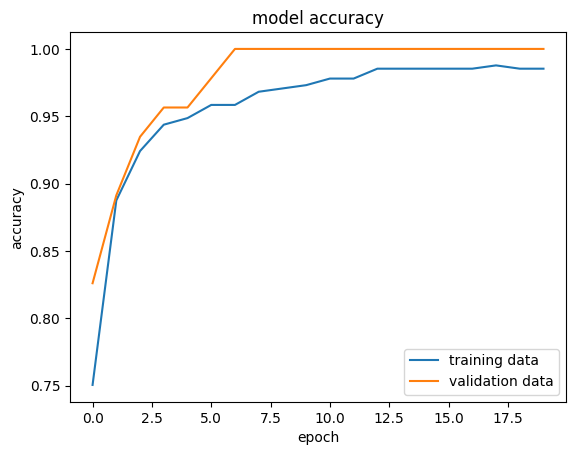

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

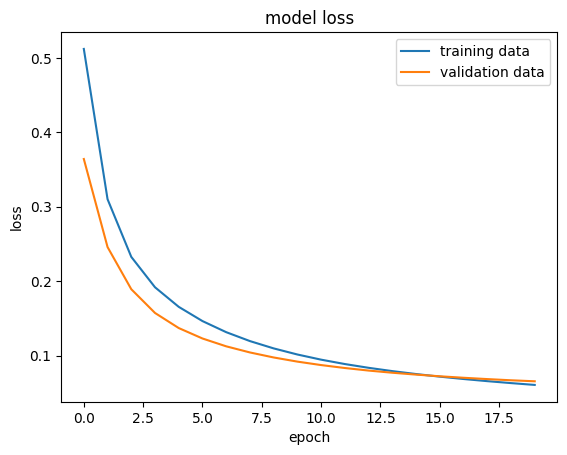

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')

**ACCURACY ON TEST DATA**

In [70]:
loss, accuracy = model.evaluate(X_test_std, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0762 


In [71]:
print(accuracy)

0.9824561476707458


In [72]:
print(loss)

0.0646393746137619


In [73]:
print(X_test_std.shape)

(114, 30)


In [74]:
print(X_test_std[0])

[-0.4877952  -0.25088379 -0.46378664 -0.51543986  0.05784012 -0.0262922
 -0.10351188 -0.31929301  0.40877389  0.11968017 -0.0858903  -0.39144008
 -0.22090758 -0.2944085  -0.10670318 -0.38822597 -0.05805714 -0.18386347
 -0.30097441 -0.05389032 -0.29186744 -0.2492245  -0.34337233 -0.37693497
  0.32080655 -0.13570975  0.0219982  -0.21989091  0.23083947  0.17173277]


In [75]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  Here'model.predict' gives Prediction Probablity of each class for that data point

In [76]:
print(Y_pred.shape)

(114, 2)


In [77]:
print(Y_pred[0])

[0.36871758 0.90940666]


In [78]:
print(X_test_std)

[[-0.4877952  -0.25088379 -0.46378664 ... -0.21989091  0.23083947
   0.17173277]
 [ 1.37325734  0.36318719  1.29254295 ...  0.93019499 -0.58958803
  -0.972629  ]
 [ 0.37225845 -0.05148067  0.38772954 ...  0.52157274 -0.08280128
  -0.21536971]
 ...
 [-0.76105639 -1.08248546 -0.76208585 ... -0.30042664 -0.3893541
  -0.32657562]
 [ 0.01558068  1.84511495  0.00969106 ... -0.50681802 -1.76086788
  -0.33345979]
 [ 1.88813896  2.58607883  1.79246268 ...  0.73702811 -0.02786985
  -0.10998887]]


In [79]:
print(Y_pred)

[[3.68717581e-01 9.09406662e-01]
 [9.49734807e-01 7.82909710e-03]
 [7.29148269e-01 9.83393714e-02]
 [2.69956619e-01 9.90913510e-01]
 [1.73727691e-01 9.97892797e-01]
 [9.99541104e-01 5.48638927e-05]
 [9.93384242e-01 4.11466142e-04]
 [6.52125776e-01 2.39761755e-01]
 [6.35126650e-01 8.01352561e-01]
 [1.03908285e-01 9.93952036e-01]
 [3.97986621e-01 9.39810693e-01]
 [7.58947074e-01 1.29158661e-01]
 [2.69596845e-01 9.51986790e-01]
 [6.08443141e-01 2.40193516e-01]
 [2.14384705e-01 9.93139327e-01]
 [9.01194811e-01 2.61751581e-02]
 [1.35579452e-01 9.70830321e-01]
 [2.72782177e-01 9.99250591e-01]
 [3.12361091e-01 9.99953985e-01]
 [9.57143962e-01 4.34301095e-03]
 [3.58143598e-01 8.58646989e-01]
 [3.98802489e-01 9.81752574e-01]
 [9.96306062e-01 4.00131918e-04]
 [1.42152593e-01 9.99471426e-01]
 [2.04580054e-01 9.97151375e-01]
 [1.39170587e-01 9.84659612e-01]
 [1.44612283e-01 9.90306020e-01]
 [1.75287321e-01 9.94423091e-01]
 [2.51135588e-01 9.85127568e-01]
 [9.91486132e-01 4.28293226e-03]
 [2.441097

**NOW USING 'argmax' FUNCTION**

In [80]:
my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


**NOW CONVERT PREDICTION PROBABLITY TO CLASS LABELS**

In [81]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


**BUILDING THE PREDICTIVE SYSTEM**

In [82]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

#CONVERT INPUT DATA INTO NUMPY ARRAY
input_data_as_numpy_array = np.asarray(input_data)

#RESHAPE THE NUMPY ARRAY AS WE ARE PREDICTING FOR ONE DATA POINT
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#STANDARDIZING THE INPUT DATA
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.19964646 0.98835504]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Conclusion**

The project successfully built a neural network to classify breast tumors as malignant or benign using the Breast Cancer Wisconsin Dataset. The preprocessing of data, standardizing, and using a neural network model helped us achieve a high accuracy in classification. The performance of the model clearly showed the inverse relationship between loss and accuracy, as expected, where the loss decreased and accuracy increased in each epoch.

The use of **StandardScaler** ensured the data was standardized, which helped improve the model's convergence and overall performance. The project shows the effectiveness of machine learning, especially neural networks, in assisting medical diagnosis, particularly for early detection of cancerous cases of the breast, and also points out the importance of preprocessing the data to get reliable and precise results.